## Project 1
* ### Heart disease Classifer (Complete Project)

### Preparing the tools
We're going to use Pandas, Metplotlib and Numpy for data analysis and manipulation

In [1]:
#Importing all tools that we need

#Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay


### Load Data

In [2]:
df = pd.read_csv("CSV/heart-disease.csv")
df.shape

(303, 14)

### Data Exploration (EDA)
The goal here is to find more about the data and become a subject matter expert on the database you're working with.

1. What question(s) are you trying to solve ?
2. What kind of data do we have and how do we treat different types ?
3. What's missing from the data and how do you deal with it ?
4. Where are the outliersd and why should you care about them ?
5. How can you add ,change or remove features to get moore out of your data ? 

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


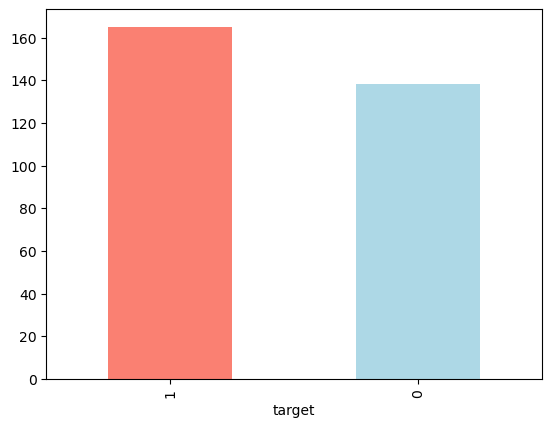

In [5]:
df["target"].value_counts().plot(kind="bar", color=['salmon', 'lightblue'])
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [9]:
#df.sex.value_counts()
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
#Compare target column with sex column 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


72 out of 96 women are supposed to suffer from Heart Disease.

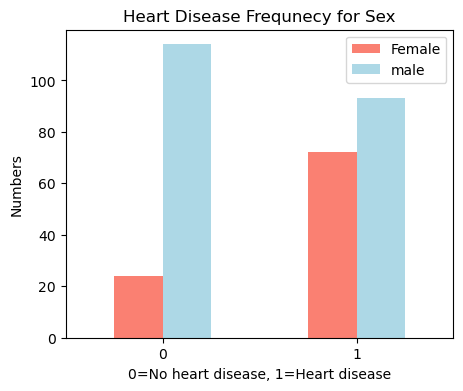

In [11]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize =(5,4),
                                   color =['salmon',"lightblue"])
plt.title("Heart Disease Frequnecy for Sex")
plt.xlabel("0=No heart disease, 1=Heart disease")
plt.ylabel("Numbers")
plt.legend(['Female','male'])
plt.xticks(rotation=0)
plt.show()

### Age vs. max Heart Rate for Heart Disease

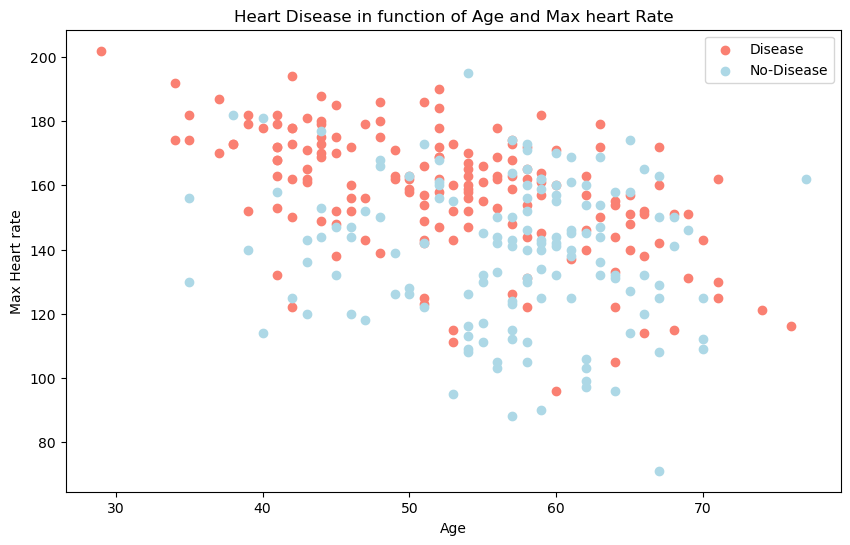

In [12]:
#Create another fighure
plt.figure(figsize=(10,6))

#scatter with positive examples
p_plot=plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')
#Scatter with negative examples
n_plot = plt.scatter(df.age[df.target==0],
                    df.thalach[df.target==0],
                    c='lightblue')
plt.title("Heart Disease in function of Age and Max heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease","No-Disease"])
plt.show();

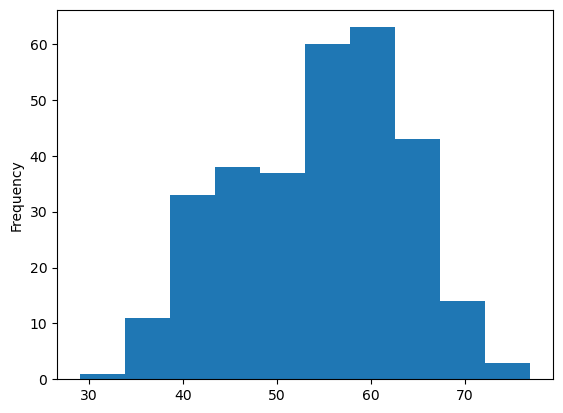

In [13]:
# Check the distribution of the age column with hisogram (Histogram)
df.age.plot.hist();
plt.show()

### Heart Disease Frequency per chest pain Type
cp - chest pain type
 * 0: Typical angina
 * 1: Atypical angina
 * 2: Non- anginal pain
 * 3: Asymptomatic

In [14]:
pd.crosstab(df.cp,df.target) #Chest pain Types vs Heart Disease

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


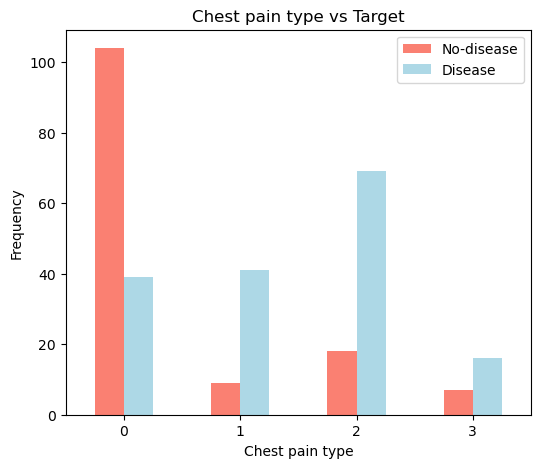

In [15]:
#Make the cross tab more visual 
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(6,5),
                                 color=["salmon","lightblue"])
plt.title("Chest pain type vs Target")
plt.xlabel("Chest pain type")
plt.ylabel("Frequency")
plt.legend(['No-disease','Disease'])
plt.xticks(rotation =0);

plt.show()

### Building a co-relation metrics

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


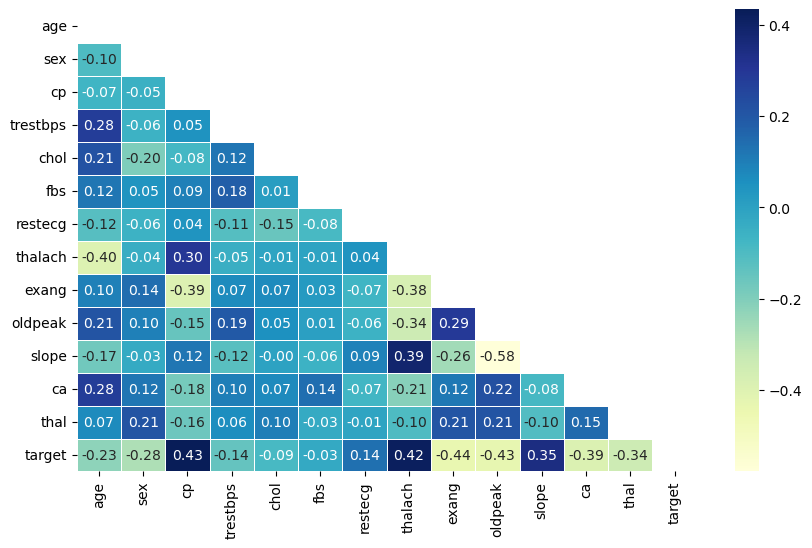

In [17]:
### Lets make our corelation matrix prettier
corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix,dtype=bool))

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,
                mask=mask,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap= "YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom-0.01, top -0.01) #Sample for adjusting the notations
plt.show()

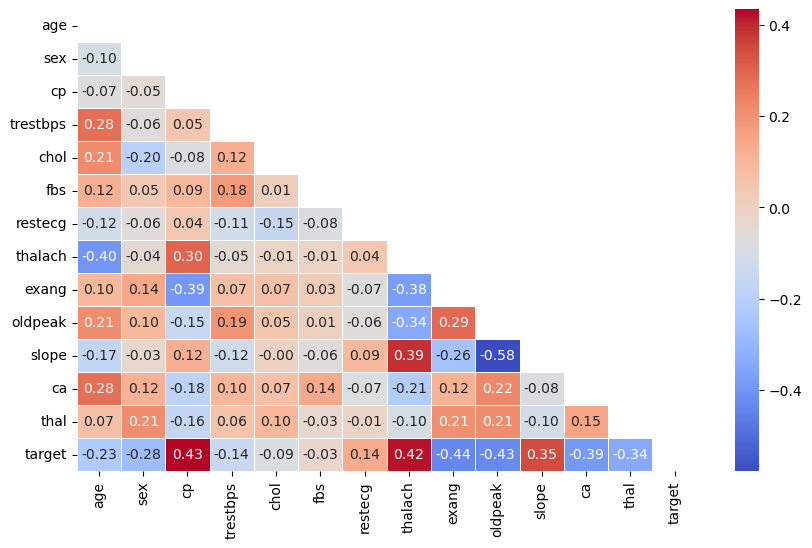

In [18]:
correlation_matrix= df.corr()

mask= np.triu(np.ones_like(correlation_matrix))
fig, ax = plt.subplots(figsize =(10,6))
sns.heatmap(correlation_matrix,
                ax=ax,
                mask=mask,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="coolwarm"
                )
plt.show()

### Modeling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
#Split data into X and y
X= df.drop("target", axis=1)
y=df['target']

In [27]:
#Split data into train and test set
np.random.seed(42)

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [28]:
X_train.shape,X_test.shape

((242, 13), (61, 13))

In [32]:
y_train.shape, y_test.shape

((242,), (61,))

### Now we,ve got our data split into training and test set, Its time to build a machine lerning model.

We'll train it (find the patterns) on the test set.

We're going to try 3 ML models:
1. Logistic Regression (Despite its name Regression, Its used for classifications)
2. K-Nearest Neighbours Classifier
3. Random Forest Classifer 

In [38]:
#Put models in a dictonary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Crate a function to fit and score models
def fit_and_score (models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    Models : a dictionary of different SCikit-learn Machine Learnbing models
    X_train : Training Data
    X_test: testing Data
    y_train : training labels
    y-test : test lables
    """

    #set random seed
    np.random.seed(42)

    #make a dictonary to keep model scores
    model_scores={}

    #loop through models
    for name,model in models.items():
        #Fit the model
        model.fit(X_train,y_train)
        
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [40]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [56]:
### test write a function to evaluate the models all together.

#Defining my models to use
my_models={
    "LG": LogisticRegression(),
    "KN": KNeighborsClassifier(),
    "RF": RandomForestClassifier()
}
score_comp ={}
def my_models_evaluation(my_models,X_train,X_test, y_train, y_test):
    """
    It iterates into all the models and find the score and returns.
    """
    for model_names, model in my_models.items():
        print(f"Fitting Model{model_names}")
        model.fit(X_train,y_train)
        score_comp[model_names]=model.score(X_test, y_test)
    return score_comp

In [57]:
my_models_evaluation(my_models=my_models,
                    X_train=X_train,
                    X_test=X_test,
                    y_train= y_train,
                    y_test=y_test)

Fitting ModelLG
Fitting ModelKN
Fitting ModelRF


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LG': 0.8852459016393442, 'KN': 0.6885245901639344, 'RF': 0.8524590163934426}

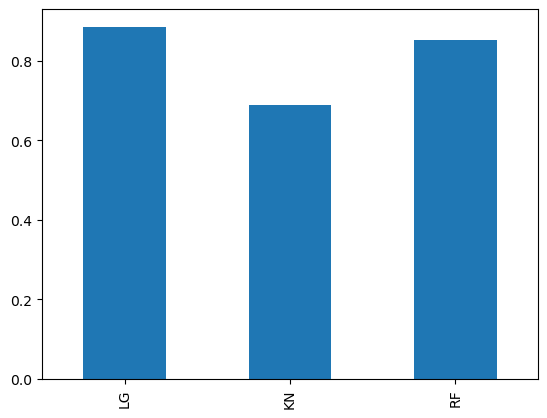

In [61]:
pd.Series(score_comp).plot(kind="bar")
plt.show()

# Now we have got a baseline model.
Let's look at the following :
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Precision
* Recall
* F1
* Classification Report
* ROC Curve
* AUC (Area Under the curve)

# Hyperparameter tuning (manually)

In [69]:
#Lets tune KNN
train_scores = []
test_scores = []

#Create a list of different values for n_neighbours
neighbors= range(1,21)

#Setup KNN instances
knn = KNeighborsClassifier()

#loop through different n_nrighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #fit the alogrithm
    knn.fit(X_train,y_train)

    #Update the training Scores list
    train_scores.append(knn.score(X_train, y_train))

    #update the test score list
    test_scores.append(knn.score(X_test,y_test))
    

In [70]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [71]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

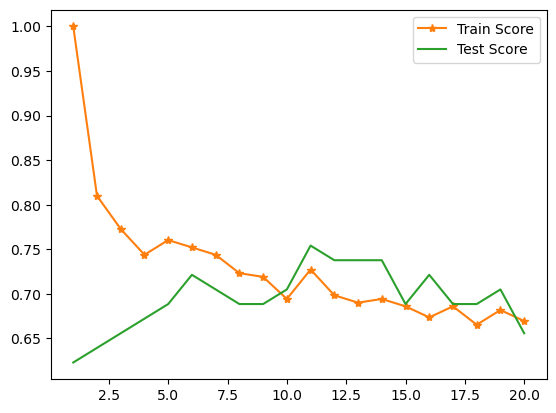

In [79]:
plt.plot(neighbours,train_scores, marker='*', label="Train Score")
plt.plot(neighbours, test_scores,label="Test Score")
plt.legend()
plt.show()

### Hyperparameter tuning  with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

using `RandomizedSearchCV`

In [92]:
#Create a hyper Parameter grid for LogisticRegression
log_reg_grid ={
    "C":np.logspace(-4,4,20),
    "solver": ["liblinear"],
}

#Create a Hyperparameter grid for RandomForestClassifer
rf_grid = {
    "n_estimators": np.arange(10,1000,50),
    "max_depth" :[None,3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)
}

#### Now we've got hyperparameter grid steup fort each of our models

In [85]:
np.random.seed(42)

#Setup randdom hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=2)
#Fit random hyperparameter 
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [86]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [ ]:
rs_log_reg.best_param_

### RandomForesetClassifier()

In [93]:
np.random.seed(42)

#Steup random Forest hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter = 20,
                          verbose=True )
rs_rf.fit(X_train,y_train)
rs_rf.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

In [96]:
rs_rf.score(X_test,y_test)

0.8688524590163934

### Hyperparameter tuning with GridSearchCV

In [97]:
#Diffrent hyperparameter for logistic regression
log_reg_grid={
    "C":np.logspace(-4,4,30),
    "solver": ['liblinear']
}
gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=2)
#fitgrid hyperparameter search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

In [98]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### Evaluate our tuned mmachine learning classifier, beyong accuracy
* ROC curve anmd AUC Score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
  
...and it would be great if cross-validation was used where possible
To make comparisons and evaluation our trained model, first we need to mae predictions.


In [99]:
#Make predicitions with tuned model
y_preds = gs_log_reg.predict(X_test)

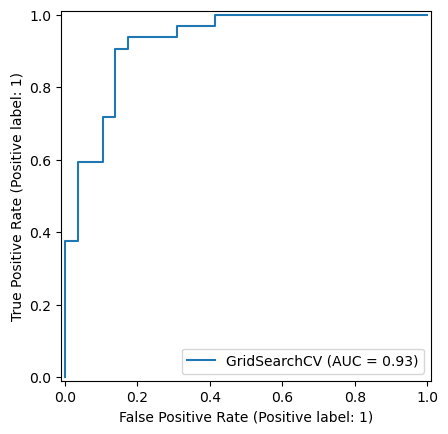

In [109]:
#Plot ROC curve and calculate AUC metric

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);
plt.show()

In [114]:
#Confusion matrix
cm=confusion_matrix(y_test,y_preds)

In [118]:
def plot_conf_mat(y_test,y_preds):
    """
    plot a naice looking confusion matrix using searbo's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(cm,
                  annot=True,
                  cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")

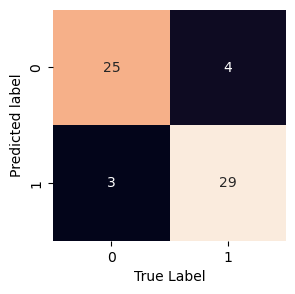

In [121]:
plot_conf_mat(y_test,y_preds)
plt.show()

Now we've got a ROC curve, an AUC metric and a confusion metric.
Lets get a classification report as well as cross-validated precision, recall and f1 Score

### Calulate evaluation metrics using cross-validation
We are going to calculate accuracy, precision, recall and F1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [124]:
### Checvk best hyperparameter
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [125]:
#create a new classifier ewith best parameters 
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")


In [137]:
#Cross-Validation Accuracy
cv_acc =  cross_val_score(clf,X,y,cv=5,
                         scoring="accuracy")
print(cv_acc)
print(np.mean(cv_acc))

[0.81967213 0.90163934 0.86885246 0.88333333 0.75      ]
0.8446994535519124


In [139]:
#Cross-Validation Precision
cv_pre = cross_val_score(clf,X,y,cv=5,scoring="precision")
print(cv_pre)
print(np.mean(cv_pre))

[0.775      0.88571429 0.85714286 0.86111111 0.725     ]
0.8207936507936507


In [140]:
#Cross-Validation recalln
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
print(cv_recall)
print(np.mean(cv_recall))

[0.93939394 0.93939394 0.90909091 0.93939394 0.87878788]
0.9212121212121213


In [141]:
#Cross-Validation F1-Score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
print(cv_f1)
print(np.mean(cv_f1))

[0.84931507 0.91176471 0.88235294 0.89855072 0.79452055]
0.8673007976269721


In [170]:
#function for CV Scores

def my_cv_score(clf):
    cv_pre =  cross_val_score(clf, X, y, cv=5, scoring="precision")
    cv_acc =  cross_val_score(clf, X, y, cv=5, scoring="accuracy")
    cv_rec =  cross_val_score(clf, X, y, cv=5, scoring="recall")
    cv_f1  =  cross_val_score(clf, X, y, cv=5, scoring="f1")

    sc_score_results = {
        "Precision": float(np.mean(cv_pre)),
        "Accuracy" : np.mean(cv_acc),
        "Recall": np.mean(cv_rec),
        "f1": np.mean(cv_f1)
    }
    
    #return pd.DataFrame(sc_score_results, index=[0])
    return sc_score_results

In [171]:
my_cv_score(clf)

{'Precision': 0.8207936507936507,
 'Accuracy': np.float64(0.8446994535519124),
 'Recall': np.float64(0.9212121212121213),
 'f1': np.float64(0.8673007976269721)}

In [189]:
def my_cv_improved(clf):
    score_metrics = ["precision", "accuracy", "recall", "f1"]
    stored_score={}
    
    for score_metric in score_metrics:
        score_cv= cross_val_score(clf,X,y,cv=5, scoring=score_metric)
        stored_score[score_metric]=round(float(np.mean(score_cv)),3)
        
    return stored_score

In [193]:
score_from_function=my_cv_improved(clf)

In [196]:
score_from_function

{'precision': 0.821, 'accuracy': 0.845, 'recall': 0.921, 'f1': 0.867}

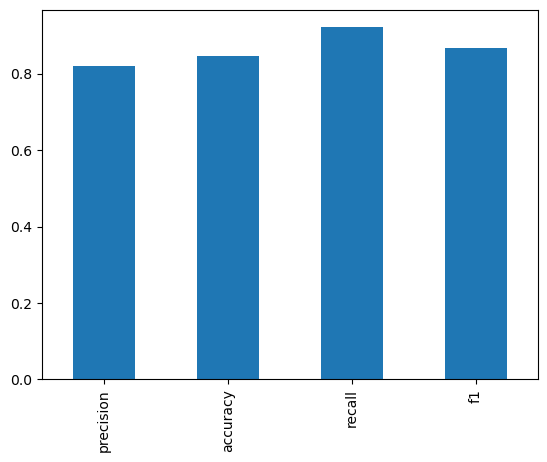

In [200]:
pd.Series(score_from_function).plot(kind="bar")
plt.show()

### Feature Importance
Feature importance is another as asking,"Which features contributed most to the outcomes of the model and how how did they contribute"

Finding features importance is different for each machine learning model.

In [203]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_
clf = LogisticRegression(C= 0.20433597178569418,
                        solver = "liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [206]:
#Check coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [208]:
# Match coef's of feature to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672721856887734),
 'sex': np.float64(-0.860445816920919),
 'cp': np.float64(0.6606707303492849),
 'trestbps': np.float64(-0.011569930902919925),
 'chol': np.float64(-0.001663741604035976),
 'fbs': np.float64(0.04386130751482091),
 'restecg': np.float64(0.3127578715206996),
 'thalach': np.float64(0.02459360818122666),
 'exang': np.float64(-0.6041303799858143),
 'oldpeak': np.float64(-0.5686285194546157),
 'slope': np.float64(0.4505161679452401),
 'ca': np.float64(-0.6360986316921434),
 'thal': np.float64(-0.6766337521354281)}

In [210]:
sorted(feature_dict.items(), key=lambda x: abs(x[1]), reverse=True)

[('sex', np.float64(-0.860445816920919)),
 ('thal', np.float64(-0.6766337521354281)),
 ('cp', np.float64(0.6606707303492849)),
 ('ca', np.float64(-0.6360986316921434)),
 ('exang', np.float64(-0.6041303799858143)),
 ('oldpeak', np.float64(-0.5686285194546157)),
 ('slope', np.float64(0.4505161679452401)),
 ('restecg', np.float64(0.3127578715206996)),
 ('fbs', np.float64(0.04386130751482091)),
 ('thalach', np.float64(0.02459360818122666)),
 ('trestbps', np.float64(-0.011569930902919925)),
 ('age', np.float64(0.0031672721856887734)),
 ('chol', np.float64(-0.001663741604035976))]

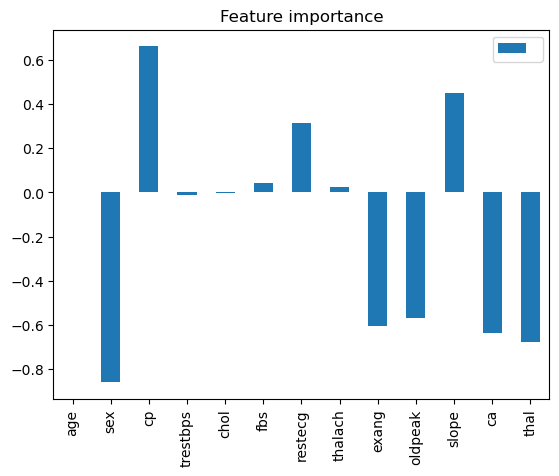

In [218]:
#Visualizing feature importance
pd.Series(feature_dict).plot.bar(title="Feature importance", legend=True);
plt.show()